# Problem Statement - E-news Express Project

In [75]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("abtest.csv")
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
df.shape

(100, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.2+ KB


In [8]:
df.dtypes

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

In [9]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


Observations:
The average time spent on the page is about 5.37 minutes with a standard deviation of 2.37 minutes
50% of the entries spent about 5.41 minutes on the page
The minimum time spent on the page was 0.19 minutes and the maximum time spent on the page was 10.71 minutes

In [10]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe(include = 'object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [13]:
# count of each data
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [14]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [15]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [16]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

Observations:
 No missing data
 No duplicates
 group and landing page has 2 uniques values with 50 data each
 converted also has 2 unique values with yes 54 and no 46
 language preferred has 3 values with 34 spanish and french and 32 english

#### Define the problem and perform an Exploratory Data Analysis

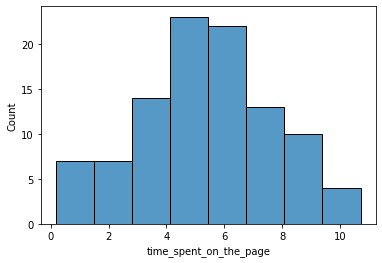

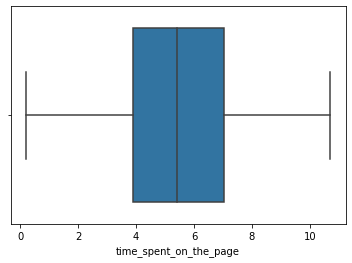

In [17]:
#Univariate analysis
# Return the distribution of the time the spent on the landing page
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

Observation:  Time spent on page is normally distributed and with no outliers.

In [18]:
#Group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

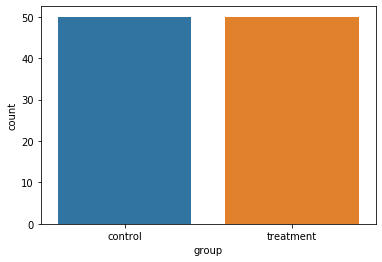

In [19]:
#Distribution of the group variable
sns.countplot(data=df,x='group')
plt.show()

The sample is equally split amongst the control and treatment groups

In [20]:
#Landing page
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

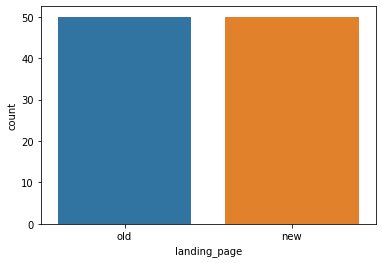

In [21]:
#Distribution of the landing_page 
sns.countplot(data=df,x='landing_page')
plt.show()

Landing page is equally split among old and new

In [22]:
#Converted
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

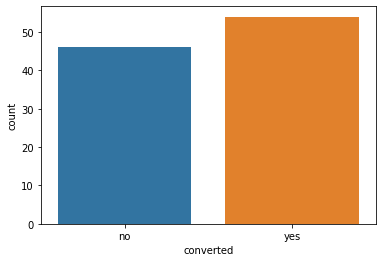

In [23]:
#distribution
sns.countplot(data=df,x='converted')
plt.show()

More people who converted to the new lading page than the people who did not convert

In [24]:
#Language preferred
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

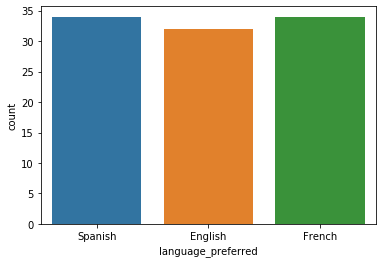

In [25]:
#distribution
sns.countplot(data=df,x='language_preferred')
plt.show()

Spanish and French has more entries than English

Bivariate Analysis

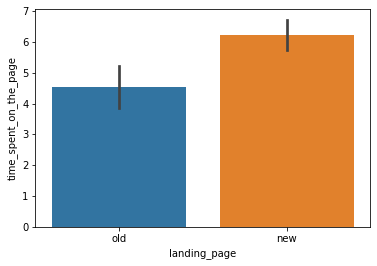

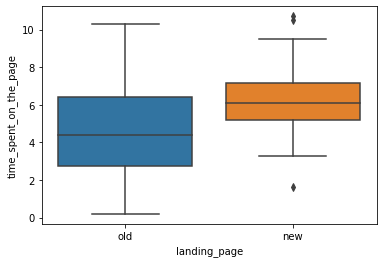

In [26]:
# Landing page vs Time spent on the page
sns.barplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

Observation: User spends more time time in new page than the old one

Conversion status and Time spent

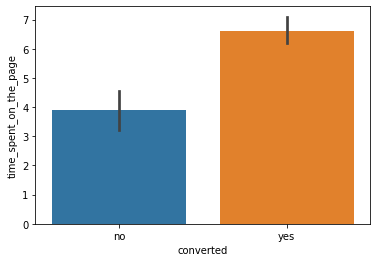

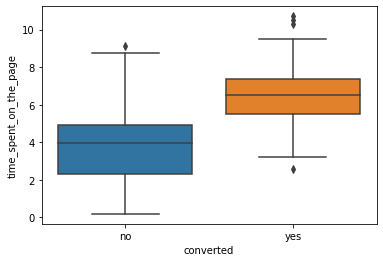

In [27]:
sns.barplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

Observation: Those who converted to a subscriber spend more time on the page

Language preferred vs Time spent

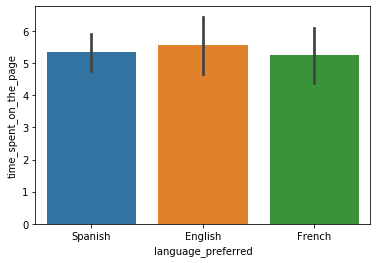

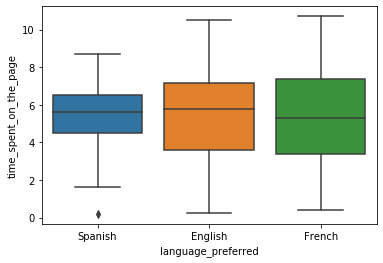

In [28]:
sns.barplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

Observation: Average time spent on the page is similar for all the preferred languages. 
             Spanish appear to have the smallest spread in time spent on the page

Relationship between preferred language, conversion status, and landing page

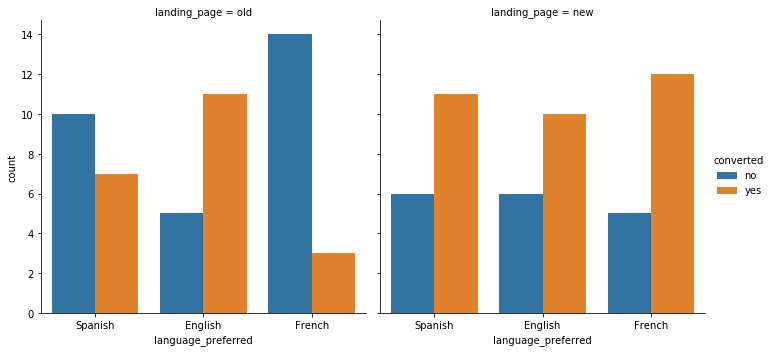

In [29]:
sns.catplot(data = df, x = 'language_preferred', hue = 'converted', col = 'landing_page', kind = 'count');

Observation: Those preferreed Spanish and French opted not to convert to a subscriber when viewing the old landing page. Users of all language preferences converted to subscribers when viewing the new landing page.

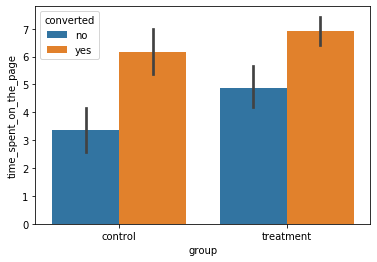

In [30]:
#Relationship between group, time spent on the page, and conversion status
sns.barplot(data = df, x = 'group', y = 'time_spent_on_the_page', hue = 'converted');

Observation: More people converted to subscribers in the treatment group comapred to the control group and users in the treatment group spent more time on the page as opposed to participants in the control group

#### 1.Do the users spend more time on the new landing page than the old landing page?

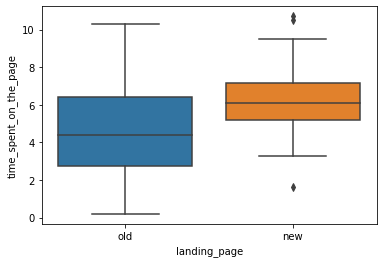

In [31]:
#Perform visual analysis 
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

Observation: average time spent for new is greater than old page

In [32]:
#Null and alternate hypothesis
H0="The mean time spent by the users on the new page is EQUAL to the mean time spent by the users on the old page"
H1="The mean time spent by the users on the new page is GREATER than the mean time spent by the users on the old page"

In [33]:
# Applying two-sample independent t-test  as standard deviation is unknown and is 1 tailed test with two population means from two independent populations
# setting significance level as 0.05

#data frame for new and old landing page users 
new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old = df[df['landing_page'] == 'old']['time_spent_on_the_page']
print('Sample standard deviation of the time spent on the new page is:', round(new.std(),2))
print('Sample standard deviation of the time spent on the old page is:', round(old.std(),2))

Sample standard deviation of the time spent on the new page is: 1.82
Sample standard deviation of the time spent on the old page is: 2.58


observation: so the standard devitation is not equal

In [34]:
# Two-sample independent t-test and determine the p-value
from scipy.stats import ttest_ind 


In [35]:
test_stat, p_value =  ttest_ind(new, old, equal_var = False, alternative = 'greater')  
print('p-value: ', p_value)

p-value:  0.0001392381225166549


In [36]:
if p_value < 0.05:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


So mean time spent by new page is greater than mean time spent by users in old page

#### 2.Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [37]:
#Visual analysis
pd.crosstab(df['landing_page'],df['converted'])

converted,no,yes
landing_page,,
new,17,33
old,29,21


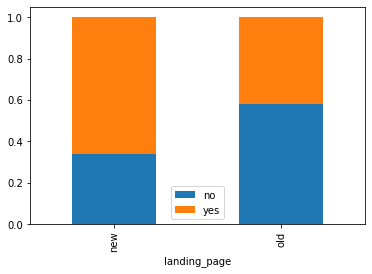

In [38]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar",stacked=True)
plt.legend()
plt.show()

Observation: Users on the new landing page are more likely to convert to subscribers than users on the old landing page

In [41]:
#null and alternate hypothesis
H0='The conversion rate of the new page is equal to the conversion rate of the old page'
H1='The conversion rate of the new page is greater than the conversion rate of the old page.'
significance=0.05

In [42]:
#applying two proportion z-test
# calculate the number of converted users in the treatment and control groups
new = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old = df[df['group'] == 'control']['converted'].value_counts()['yes']
#total number of users in the treatment and control groups
n_treatment = df.group.value_counts()['treatment']
n_control = df.group.value_counts()['control'] 
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [44]:
#p value
from statsmodels.stats.proportion import proportions_ztest   
test_stat, p_value = proportions_ztest([new, old] , [n_treatment, n_control], alternative ='larger') 
print('p-value: ', p_value)

p-value:  0.008026308204056278


In [45]:
if p_value < 0.05:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


#### 3.Does the converted status depend on the preferred language?

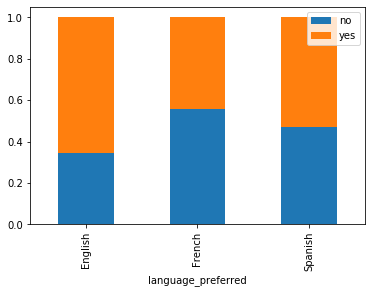

In [46]:
#visual analysis
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", stacked=True)
plt.legend()
plt.show()

In [47]:
#null and alternate hypotheses
H0='Converted status is independent of the preferred language'
H1='Converted status is dependent of the preferred language'

In [48]:
#Applying chi-square test  as it involves 2 categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])  
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [49]:
#p value
from scipy.stats import chi2_contingency  
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table) 
print('p-value: ', p_value)

p-value:  0.2129888748754345


In [51]:
if p_value < 0.05:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Fail to reject the null hypothesis.


#### 4.Is the time spent on the new page the same for the different language users?

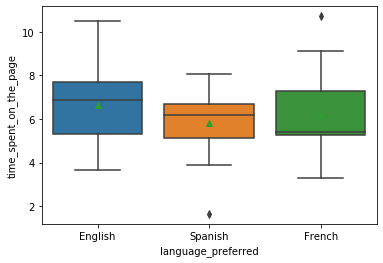

In [53]:
#visual analysis
df_new = df[df['landing_page'] == 'new']
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [54]:
#mean time
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [55]:
#null and alternate hypothesis
H0='The mean time spent on the new lading page is the same across all preferred langauges'
H1='At least one of the mean times spent on the new landing page is different amongst the preferred languages'

In [66]:
#applying one-way ANOVA test  as it involves 3 population means
eng = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
frn = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   
spa = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']  

In [67]:
#Shapiro-Wilk’s test
H0='Carbon emission follows a normal distribution'
H1='Carbon emission does not follow a normal distribution'

In [68]:
from scipy import stats
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040039539337158


Observation: p-value is very large so failing to reject the null hypothesis

In [69]:
#Levene’s test
#H0 : All the population variances are equal
#H1 : At least one variance is different from the rest

In [70]:
statistic, p_value = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'])
print('p-value: ', p_value)

p-value:  0.46711357711340173


p value is large hence rejecting null hypothesis

In [71]:
#One-way ANOVA
#p value
from scipy.stats import f_oneway 
test_stat, p_value = f_oneway(eng, frn, spa)  
print('p-value: ', p_value)

p-value:  0.43204138694325955


In [74]:
if p_value < 0.05:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Fail to reject the null hypothesis.


Recommendation:
- It is best to implement new landing page as the time spent on the new landing page is greater than the time spent on the old landing page
- The new landing page has an increased conversion rate so more resources can be directed towards it
- Good to deploy the new landing page with all the exiting preferred language because there is no signficant difference between the average time spent on the new page across the preferred languages